<a href="https://colab.research.google.com/github/wcj365/python-stats-dataviz/blob/master/assignments/Assignment-04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# <1> 
# Import libraries
# (Write code here)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# <2>
# load the 2017-2018 school year file "MERGED2017_18_PP.csv" 
# Don't include all columns - too many and take up computer resources (computeing power and memory)
# Only load the following 10 columns should be loaded:
# UNITID: 
# OPEID:              
# OPEID6:            
# INSTNM:          
# CITY:                      
# ZIP:               
# ADM_RATE:           
# UGDS:             
# TUITIONFEE_IN:      

# (Write code here)
df = pd.read_csv('CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv', usecols=['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'ZIP', 'ADM_RATE', 'UGDS', 'TUITIONFEE_IN'])
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN
0,100654,100200,1002,Alabama A & M University,Normal,35762,0.9027,4824.0,9857.0
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,35294-0110,0.9181,12866.0,8328.0
2,100690,2503400,25034,Amridge University,Montgomery,36117-3553,NaN,322.0,6900.0
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,35899,0.8123,6917.0,10280.0
4,100724,100500,1005,Alabama State University,Montgomery,36104-0271,0.9787,4189.0,11068.0


In [3]:
# <3>
# Load the scorecard file Most-Recent-Cohorts-Scorecard-Elements.csv from the link:
# https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Scorecard-Elements.csv
# This file has thre median earnings which is not present in the previous file
# Only load the two columns:
# UNITID - This column is the unique identity for each college and will be used to join with the previous file
# MD_EARN_WNE_P10  - This column has the median earnings
# (Write code here)

df_scorecard = pd.read_csv('https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-Scorecard-Elements.csv', usecols = ['UNITID', 'MD_EARN_WNE_P10'])
df_scorecard.head(5)

,UNITID,MD_EARN_WNE_P10
0,100654,31000
1,100663,41200
2,100690,39600
3,100706,46700
4,100724,27700


In [4]:
# <4> 
# Explore this file - number of colleges, head/tail/sample etc.
# Notice this file has different number of colleges from the previous file
# This indicate they are not identical and they overlap (they don't contain the same set of colleges)
# (Write code here)

df_scorecard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 2 columns):
UNITID             7112 non-null int64
MD_EARN_WNE_P10    5887 non-null object
dtypes: int64(1), object(1)
memory usage: 111.2+ KB


In [49]:
df_scorecard.head(5)

,UNITID,MD_EARN_WNE_P10
0,100654,31000
1,100663,41200
2,100690,39600
3,100706,46700
4,100724,27700


In [50]:
df_scorecard.tail(5)

,UNITID,MD_EARN_WNE_P10
7107,48312404,NaN
7108,48387801,NaN
7109,48400201,NaN
7110,48778201,NaN
7111,49005401,NaN


In [51]:
# <5>
#Join the two files together to produce a third file which contain all the columns and all colleges that are common to both files
# (Write code here)

merged_df = pd.merge(left=df, right=df_scorecard, left_on='UNITID', right_on='UNITID')
merged_df.sample(5)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
4039,248624,533000,5330,Fayette County Career & Technical Institute Pr...,Uniontown,15401,NaN,90.0,NaN,39300
1431,161244,205500,2055,University of Maine at Machias,Machias,04654-1397,NaN,522.0,7680.0,27500
1370,159027,2582200,25822,Guy's Shreveport Academy of Cosmetology Inc,Shreveport,71105,NaN,90.0,NaN,16600
952,145239,2522800,25228,Fox College,Bedford Park,60638,0.6053,433.0,15160.0,33500
3527,228246,361300,3613,Southern Methodist University,Dallas,75275-0221,0.4877,6427.0,52498.0,60700


In [53]:
# merged_df.loc[merged_df['UNITID'] == 100706]


In [54]:
# <6>
# Explore the new file - number of colleges, head/tail/sample etc.
# (Write code here)
merged_df.head(5)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
0,100654,100200,1002,Alabama A & M University,Normal,35762,0.9027,4824.0,9857.0,31000
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,35294-0110,0.9181,12866.0,8328.0,41200
2,100690,2503400,25034,Amridge University,Montgomery,36117-3553,NaN,322.0,6900.0,39600
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,35899,0.8123,6917.0,10280.0,46700
4,100724,100500,1005,Alabama State University,Montgomery,36104-0271,0.9787,4189.0,11068.0,27700


In [55]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7112 entries, 0 to 7111
Data columns (total 10 columns):
UNITID             7112 non-null int64
OPEID              7112 non-null int64
OPEID6             7112 non-null int64
INSTNM             7112 non-null object
CITY               7112 non-null object
ZIP                7112 non-null object
ADM_RATE           2037 non-null float64
UGDS               6364 non-null float64
TUITIONFEE_IN      4021 non-null float64
MD_EARN_WNE_P10    5887 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 611.2+ KB


In [56]:
merged_df.describe()

,UNITID,OPEID,OPEID6,ADM_RATE,UGDS,TUITIONFEE_IN
count,7.112000e+03,7.112000e+03,7112.000000,2037.000000,6364.000000,4021.000000
mean,1.867121e+06,1.866750e+06,16755.217660,0.681822,2427.202074,15097.328277
std,6.958737e+06,3.315240e+06,14589.294487,0.212179,5482.365605,12725.207303
min,1.006540e+05,1.002000e+05,1002.000000,0.000000,0.000000,480.000000
25%,1.740728e+05,3.229750e+05,3224.750000,0.550000,106.000000,5252.000000
50%,2.289995e+05,1.056050e+06,10542.000000,0.707600,401.000000,11330.000000
75%,4.506005e+05,3.025825e+06,30106.000000,0.838400,2018.750000,19400.000000
max,4.900540e+07,8.209884e+07,42698.000000,1.000000,77269.000000,74514.000000


In [57]:
merged_df.sample(5)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
356,117706,122600,1226,Los Angeles Pierce College,Woodland Hills,91371-0002,NaN,16439.0,1220.0,34900
3261,218919,345500,3455,Voorhees College,Denmark,29042,0.5344,475.0,12630.0,24500
2778,205142,2287900,22879,Raphael's School of Beauty Culture Inc-Niles,Niles,44446,NaN,135.0,NaN,16400
5958,475255,3030800,30308,American Broadcasting School-Online Program,Oklahoma City,73115,NaN,34.0,NaN,27900
4376,395690,2553600,25536,Diversified Vocational College,Los Angeles,90017-1604,NaN,655.0,NaN,21300


In [11]:
merged_df.tail()

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
7107,48312404,108163,1081,Arizona State University at Yuma,Yuma,853656900,NaN,NaN,NaN,NaN
7108,48387801,4223701,42237,Bay Area Medical Academy - San Jose Satellite ...,San Jose,95113,NaN,NaN,NaN,NaN
7109,48400201,4228101,42281,High Desert Medical College,Lancaster,935340000,NaN,NaN,NaN,NaN
7110,48778201,4221501,42215,BCI - Malden,Malden,021480000,NaN,NaN,NaN,NaN
7111,49005401,4182601,41826,Health Career Institute- Lauderdale Lakes,Lauderdale Lakes,333137268,NaN,NaN,22575.0,NaN


In [36]:
# <7>
# Find out the top 100 colleges that are hardest to get in (Top 100) from this new file
# (Write code here)

df_temp = merged_df[merged_df['ADM_RATE'] != 0]
df_temp = df_temp.sort_values(by=["ADM_RATE"], ascending=True).head(100)
df_temp.head(10)

,UNITID,OPEID,OPEID6,INSTNM,CITY,ZIP,ADM_RATE,UGDS,TUITIONFEE_IN,MD_EARN_WNE_P10
2978,211893,325100,3251,Curtis Institute of Music,Philadelphia,19103,0.0330,131.0,2675.0,PrivacySuppressed
3979,243744,130500,1305,Stanford University,Stanford,94305,0.0473,7056.0,49617.0,94000
1557,166027,215500,2155,Harvard University,Cambridge,02138,0.0516,7532.0,48949.0,89700
2302,192110,274200,2742,The Juilliard School,New York,10023-6588,0.0592,486.0,43170.0,32800
2123,186131,262700,2627,Princeton University,Princeton,08544-0070,0.0641,5246.0,47140.0,74700
2233,190150,270700,2707,Columbia University in the City of New York,New York,10027,0.0661,8170.0,57208.0,83300
633,130794,142600,1426,Yale University,New Haven,06520,0.0693,5742.0,51400.0,83200
1575,166683,217800,2178,Massachusetts Institute of Technology,Cambridge,02139-4307,0.0717,4489.0,49892.0,104700
212,110404,113100,1131,California Institute of Technology,Pasadena,91125,0.0774,961.0,49908.0,85900
427,121345,117300,1173,Pomona College,Claremont,91711-6319,0.0836,1567.0,51075.0,58100


In [37]:
# <8>
# Display the summary statistics of the in-state tuitions of the top 100 colleges that are hardest to get in
# (Write code here)

df_temp['ADM_RATE'].describe()

count    100.000000
mean       0.179126
std        0.068750
min        0.033000
25%        0.126375
50%        0.194600
75%        0.240150
max        0.279900
Name: ADM_RATE, dtype: float64

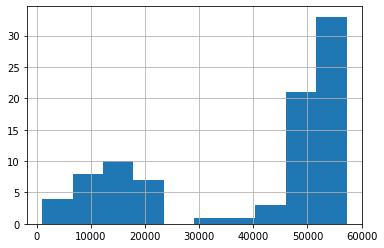

In [39]:
# <9>
# Display the histogram of the in-state tuitions of the top 100 colleges that are hardest to get in
# (Write code here)

df_temp['TUITIONFEE_IN'].hist()

In [40]:
# <10>
# Display the summary statistics of the earning potentials of the top 100 colleges that are hardest to get in
# (Write code here)

df_temp['MD_EARN_WNE_P10'] = pd.to_numeric(df_temp['MD_EARN_WNE_P10'], errors='coerce')
df_temp['MD_EARN_WNE_P10'].describe()

count        89.000000
mean      60975.280899
std       18845.208463
min       25400.000000
25%       49700.000000
50%       61200.000000
75%       74000.000000
max      104700.000000
Name: MD_EARN_WNE_P10, dtype: float64

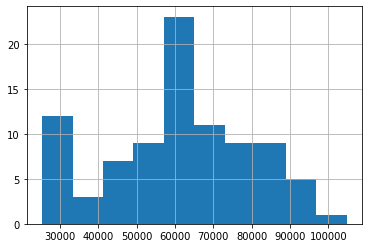

In [41]:
# <11>
# Display the histogram of the earning potentials of the top 100 colleges that are hardest to get in
# (Write code here)

df_temp['MD_EARN_WNE_P10'].hist()

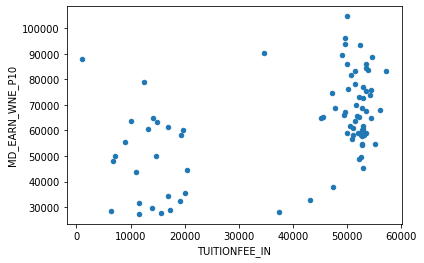

In [43]:
# <12>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Pandas
# (Write code here)

df_temp.plot.scatter(x = 'TUITIONFEE_IN', y = 'MD_EARN_WNE_P10')

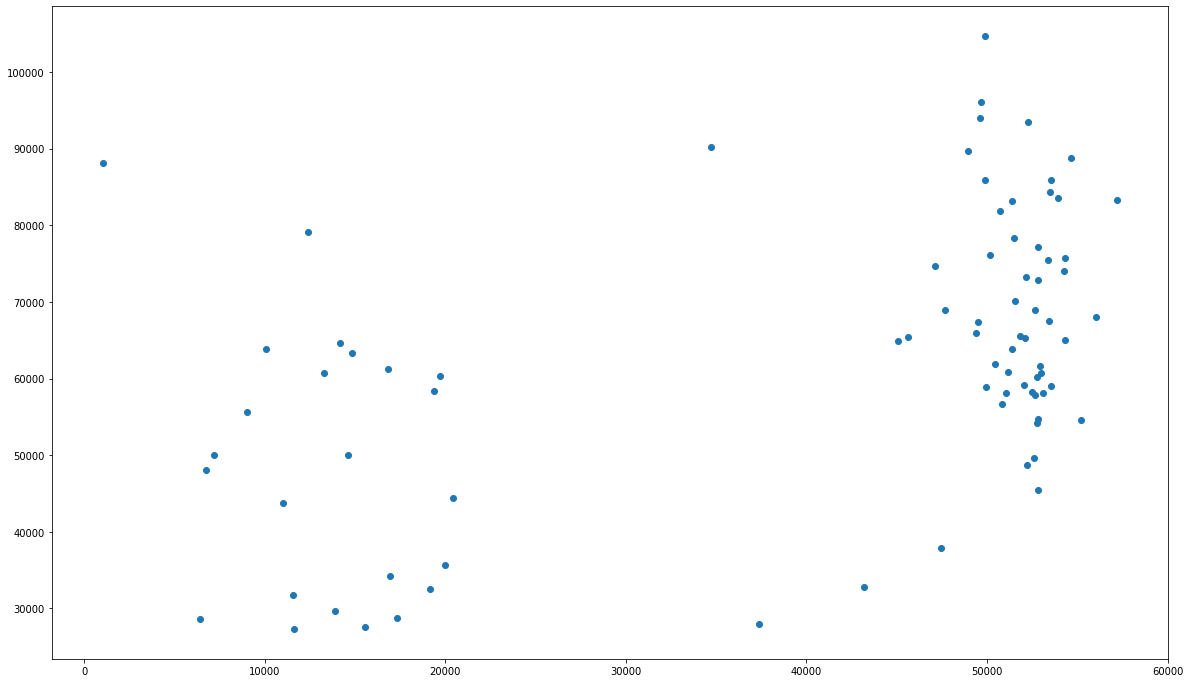

In [44]:
# <13>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Matplotlib
# (Write code here)

plt.figure(figsize=(20, 12))
plt.scatter(df_temp['TUITIONFEE_IN'], df_temp['MD_EARN_WNE_P10'])

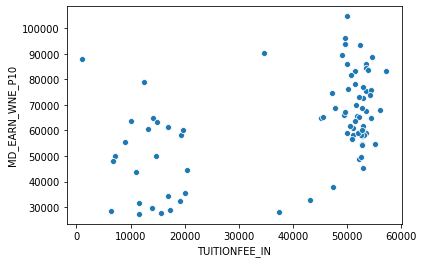

In [59]:
# <14>
# Make a scatter plot of the in-state tuition and the median graduate earnings of 
# the top 100 colleges that are hardest to get in
# using Seaborn
# (Write code here)

sns.scatterplot(df_temp['TUITIONFEE_IN'], df_temp['MD_EARN_WNE_P10'])

In [60]:
# <15> 
# Your observation/conclusion of the scatter plot (use the following Markdown cell)

### According to scatter plot shown above for In-state tuition fees vs Median graduate earnings of top 100 colleges that are hardest to get in, I think for colleges that have higher tuition fees, mostly their graduates have higher earnings as compared to lower tuition fees colleges.